***Name : Tazmeen Afroz***  

***Roll No : 22P-9252***

***Section : BAI-6A***

***Assigment No 1***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1. Implement a k-Armed Bandit Simulator**

In [3]:

class KArmedBandit:
    def __init__(self, k):
        self.k = k
        self.q = np.random.normal(0, 1, k)
    
    def pull_arm(self, action):
        return np.random.normal(self.q[action], 1)
    

bandit = KArmedBandit(10)
print("reward for action 0: ", bandit.pull_arm(0))
print("reward for action 1: ", bandit.pull_arm(1))
print("reward for action 2: ", bandit.pull_arm(2))

reward for action 0:  0.2433843587355209
reward for action 1:  0.194825382019437
reward for action 2:  -1.7563574799638375


**2. Implement ε-Greedy Action Selection**

In [4]:

class EpsilonGreedyAgent:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        return np.argmax(self.q_values)
    
    def update(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]


agent = EpsilonGreedyAgent(10, 0.1)
action = agent.select_action()
reward = bandit.pull_arm(action)
agent.update(action, reward)
print("action selected: ", action)
print("reward: ", reward)
print("q values: ", agent.q_values)
print("action counts: ", agent.action_counts)


action selected:  0
reward:  -0.2556940149037446
q values:  [-0.25569401  0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
action counts:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**3. Implement Optimistic Initial Values**


In [ ]:

class OptimisticEpsilonGreedyAgent:
    def __init__(self, k, epsilon, initial_value):
        self.k = k
        self.epsilon = epsilon
        self.q_values = np.ones(k) * initial_value
        self.action_counts = np.zeros(k)

    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        return np.argmax(self.q_values)
    
    def update(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]



agent = OptimisticEpsilonGreedyAgent(10, 0.1, 5)
action = agent.select_action()
reward = bandit.pull_arm(action)
agent.update(action, reward)
print("action selected: ", action)
print("reward: ", reward)
print("q values: ", agent.q_values)
print("action counts: ", agent.action_counts)

# # now for second action
# action = agent.select_action()
# reward = bandit.pull_arm(action)
# agent.update(action, reward)
# print("2nd action selected: ", action)
# print("reward: ", reward)
# print("q values: ", agent.q_values)
# print("action counts: ", agent.action_counts)





action selected:  0
reward:  0.3375819659918792
q values:  [0.33758197 5.         5.         5.         5.         5.
 5.         5.         5.         5.        ]
action counts:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2nd action selected:  1
reward:  -0.3798139576171862
q values:  [ 0.33758197 -0.37981396  5.          5.          5.          5.
  5.          5.          5.          5.        ]
action counts:  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]



**4. Implement Upper Confidence Bound (UCB) Algorithm**


In [ ]:
class UCBAgent:
    def __init__(self, k, c):
        self.k = k
        self.c = c
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.t = 0
    
    def select_action(self):
        self.t += 1
        untried_actions = np.where(self.action_counts == 0)[0]
        if len(untried_actions) > 0:
            return np.random.choice(untried_actions)
        
        confidence_bounds = self.q_values + self.c * np.sqrt(np.log(self.t) / (self.action_counts ))
        return np.argmax(confidence_bounds)
    
    def update(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

agent = UCBAgent(10, 2)
action = agent.select_action()
reward = bandit.pull_arm(action)
agent.update(action, reward)
print("agent selected action: ", action)
print("reward: ", reward)
print("q values: ", agent.q_values)
print("action counts: ", agent.action_counts)

# # now for second action
# action = agent.select_action()
# reward = bandit.pull_arm(action)
# agent.update(action, reward)
# print("agent selected 2nd action: ", action)
# print("reward: ", reward)
# print("q values: ", agent.q_values)
# print("action counts: ", agent.action_counts)





agent selected action:  2
reward:  -1.0223482749525947
q values:  [ 0.          0.         -1.02234827  0.          0.          0.
  0.          0.          0.          0.        ]
action counts:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
agent selected 2nd action:  0
reward:  -0.481928763948854
q values:  [-0.48192876  0.         -1.02234827  0.          0.          0.
  0.          0.          0.          0.        ]
action counts:  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**5. Experiment: Compare Strategies:**

In [22]:
def run_experiments(num_runs=2000, time_steps=1000):
    rewards = np.zeros((3, time_steps))
    optimal_actions = np.zeros((3, time_steps))
    
    for run in range(num_runs):
        print(f"Run {run + 1} started")
        bandit = KArmedBandit(10)
        optimal_arm = np.argmax(bandit.q)
        print(f"Optimal arm: {optimal_arm}")
        
        agents = [
            EpsilonGreedyAgent(10, 0.1),
            OptimisticEpsilonGreedyAgent(10, 0.1, 5.0),
            UCBAgent(10, 2.0)
        ]

        for i, agent in enumerate(agents):
            print(f"Running agent {i + 1}")
            for step in range(time_steps):
                action = agent.select_action()
                reward = bandit.pull_arm(action)
                agent.update(action, reward)
                rewards[i, step] += reward
                optimal_actions[i, step] += (action == optimal_arm)
                if (step + 1) % 200 == 0:
                    print(f"Step {step + 1}: action {action}, reward {reward:.3f}")

    rewards /= num_runs
    optimal_actions /= num_runs
    print("All runs completed")
    return rewards, optimal_actions



*6. Visualization Task*



In [23]:

def plot_results(rewards, optimal_actions):
    labels = ["Epsilon-Greedy (ε=0.1)", "Optimistic ε-Greedy (ε=0.1, Q=5)", "UCB (c=2.0)"]
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    for i in range(len(labels)):
        plt.plot(rewards[i], label=labels[i])
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Average Reward vs. Steps")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    for i in range(len(labels)):
        plt.plot(optimal_actions[i], label=labels[i])
    plt.xlabel("Steps")
    plt.ylabel("Optimal Action (%)")
    plt.title("Optimal Action Selection over Time")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()



In [24]:
rewards, optimal_actions = run_experiments()

Run 1 started
Optimal arm: 6
Running agent 1
Step 200: action 0, reward 0.500
Step 400: action 6, reward 2.314
Step 600: action 6, reward 0.615
Step 800: action 6, reward 1.105
Step 1000: action 3, reward 1.370
Running agent 2
Step 200: action 3, reward 0.400
Step 400: action 3, reward 2.047
Step 600: action 6, reward 1.816
Step 800: action 6, reward 1.966
Step 1000: action 6, reward -0.878
Running agent 3
Step 200: action 6, reward 1.061
Step 400: action 6, reward 0.630
Step 600: action 6, reward 0.773
Step 800: action 6, reward 1.467
Step 1000: action 6, reward 1.271
Run 2 started
Optimal arm: 0
Running agent 1
Step 200: action 0, reward 1.042
Step 400: action 0, reward -0.116
Step 600: action 0, reward 0.351
Step 800: action 0, reward 0.634
Step 1000: action 0, reward 2.960
Running agent 2
Step 200: action 0, reward 1.871
Step 400: action 5, reward 0.294
Step 600: action 0, reward 1.703
Step 800: action 0, reward 1.287
Step 1000: action 0, reward 0.098
Running agent 3
Step 200: acti

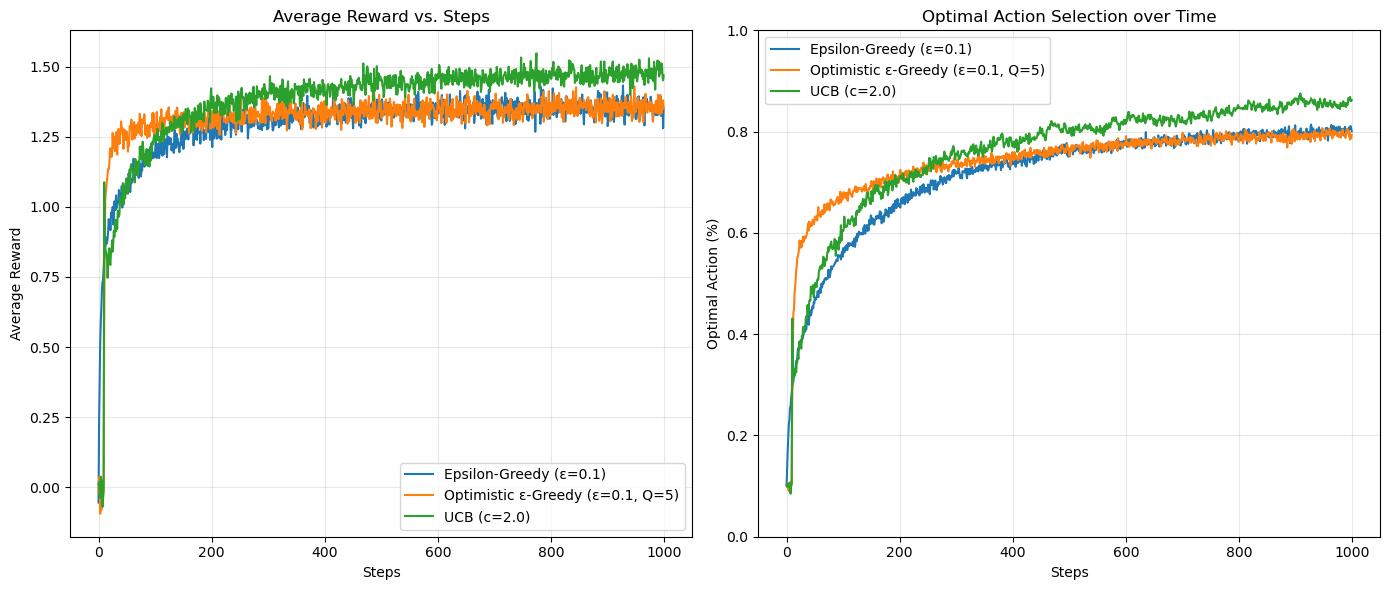

In [25]:

plot_results(rewards, optimal_actions)